<a href="https://colab.research.google.com/github/jeffersonramelo/Minicurso_Decision_Tree/blob/main/Minicurso_%C3%A1rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn import datasets

# Carregar a base de dados Iris
iris = datasets.load_iris()

# Criar um DataFrame do pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar as primeiras 10 linhas do DataFrame
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


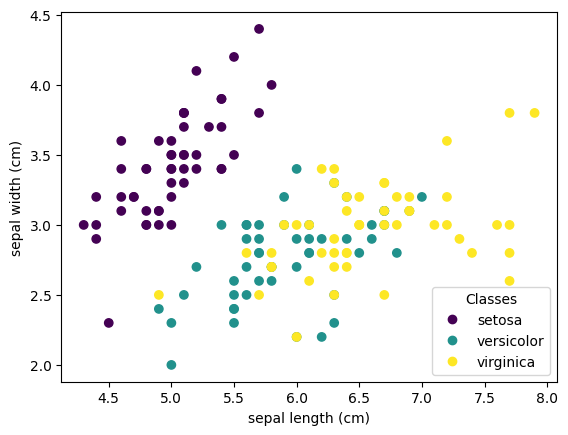

In [13]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

O algoritmo utilizado no exemplo é o CART (Classification and Regression Trees). O DecisionTreeClassifier do scikit-learn implementa o algoritmo CART. No exemplo fornecido, o DecisionTreeClassifier do scikit-learn por padrão utiliza o critério de Gini para divisão dos nós, o que é uma característica do algoritmo CART.

Se desejar utilizar um critério diferente, como a entropia (mais próximo ao ID3), você pode especificar isso ao criar o classificador:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

O scikit-learn não fornece uma implementação direta do algoritmo C4.5. No entanto, você pode usar a biblioteca c45 disponível no PyPI, que é uma implementação do algoritmo C4.5 em Python.

Para utilizar o algoritmo CHAID, você pode utilizar a biblioteca CHAID em Python. A biblioteca CHAID pode ter algumas limitações em relação a funcionalidades e suporte, então é importante considerar isso ao escolher a ferramenta para seu projeto. Se precisar de mais informações ou assistência, estou à disposição!

Acurácia: 1.00
Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC: 1.00


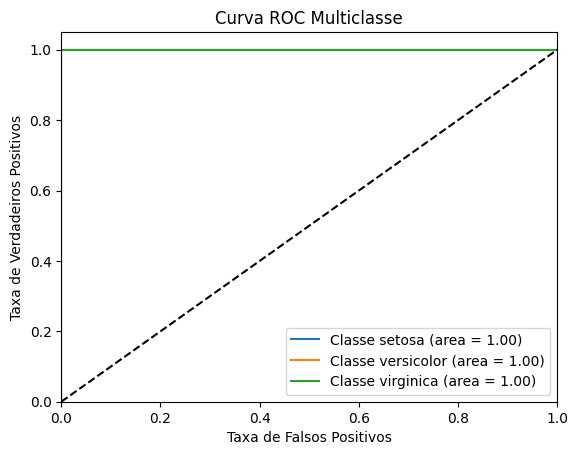

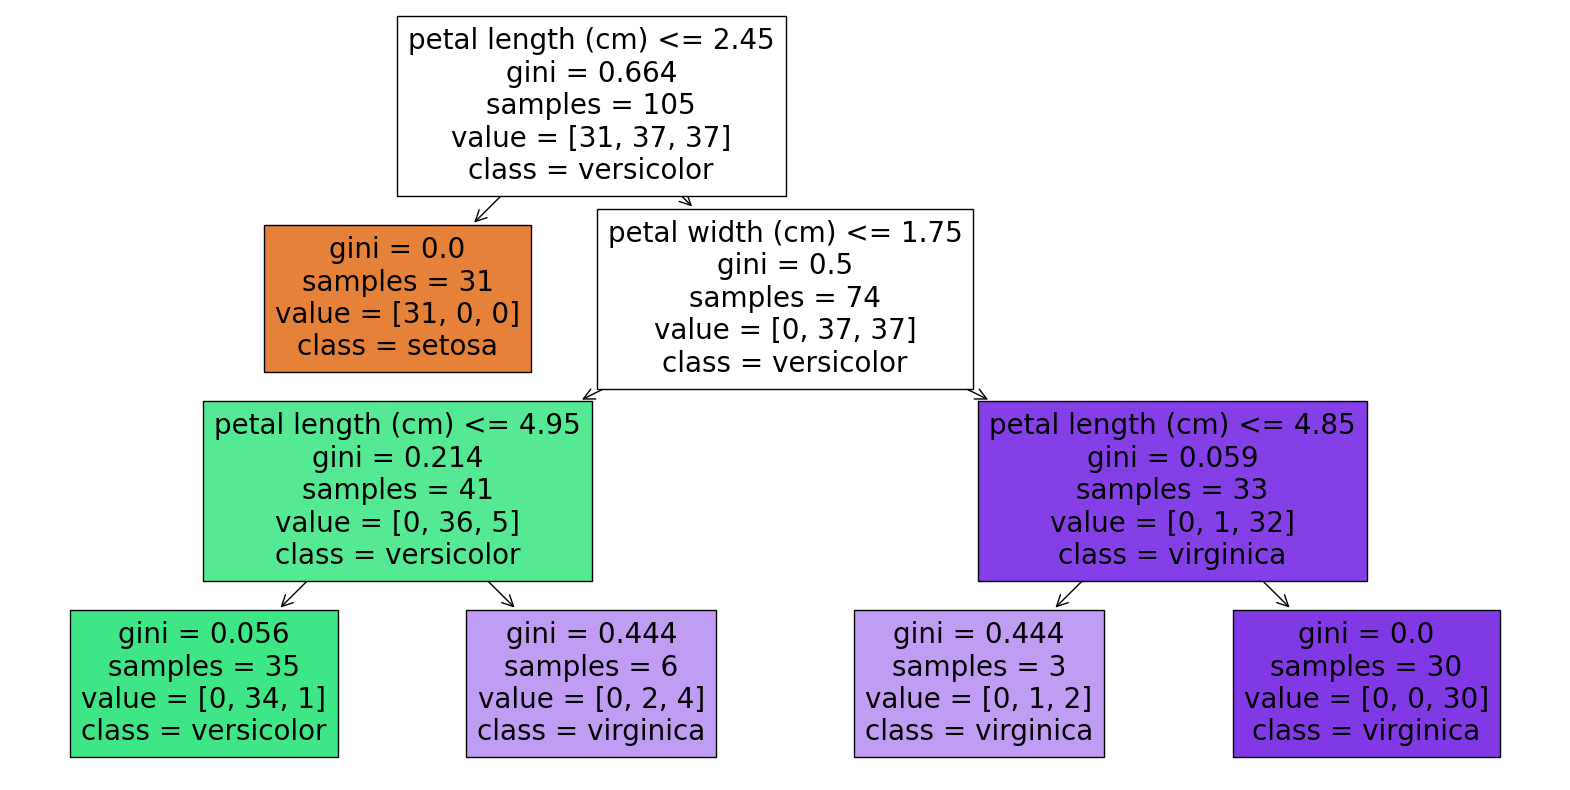

In [17]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import label_binarize

# Carregar a base de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de árvore de decisão com hiperparâmetros para controlar overfitting
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2)

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Relatório de Classificação:")
print(class_report)

# Binarizar as labels para calcular a ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Calcular a AUC para cada classe e a média
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc:.2f}")

# Calcular as curvas ROC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plotar a curva ROC
plt.figure()
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'Classe {iris.target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


MODELO LOGIT

Acurácia: 1.00
Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC: 1.00


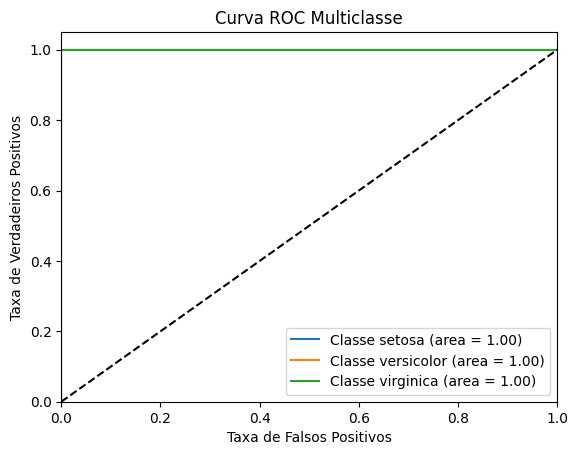

In [16]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Carregar a base de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
clf = LogisticRegression(max_iter=200)

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Relatório de Classificação:")
print(class_report)

# Binarizar as labels para calcular a ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = clf.predict_proba(X_test)  # Para ROC, precisamos das probabilidades

# Calcular a AUC para cada classe e a média
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc:.2f}")

# Calcular as curvas ROC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plotar a curva ROC
plt.figure()
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'Classe {iris.target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()
